In [36]:
import pandas as pd
import numpy as np


print("Delhi Air Quality Project - Model Training")

Delhi Air Quality Project - Model Training


In [37]:
# Loading AQI data

df = pd.read_csv('../data/processed/final_delhi_aqi_weather_merged_final.csv')
df['date'] = pd.to_datetime(df['date'])
print(" Data Loaded Successfully")
df.head()

 Data Loaded Successfully


,date,year,month,season,day_of_week,is_weekend,state,area,number_of_monitoring_stations,AQI,...,temperature_2m_min,temperature_2m_mean,precipitation_mm,humidity_percent,wind_speed,has_O3,has_NO2,has_PM2.5,has_PM10,has_CO
0,2022-04-01,2022,4,Summer,4,0,Delhi,Delhi,36,218,...,21.5,28.9,0.0,26,5.666712,False,True,True,True,False
1,2022-04-02,2022,4,Summer,5,1,Delhi,Delhi,37,226,...,19.9,28.9,0.0,24,3.222248,False,True,True,True,False
2,2022-04-03,2022,4,Summer,6,1,Delhi,Delhi,36,245,...,21.9,30.1,0.0,19,3.944476,False,False,True,True,False
3,2022-04-04,2022,4,Summer,0,0,Delhi,Delhi,37,262,...,21.8,29.1,0.0,18,4.805594,False,False,False,True,False
4,2022-04-05,2022,4,Summer,1,0,Delhi,Delhi,38,233,...,20.8,29.4,0.0,20,4.972262,False,False,True,True,False


In [38]:
#feature engineering

df_features = df.copy()

#Time-based features
df_features['Yesterday_AQI'] = df_features['AQI'].shift(1)
df_features['last_7days_avg'] = df_features['AQI'].rolling(7).mean().shift(1)
df_features['last_14days_avg'] = df_features['AQI'].rolling(14).mean().shift(1)


#seasonal patterns
df_features['month'] = df_features['date'].dt.month
df_features['is_weekend'] = (df_features['date'].dt.dayofweek >= 5).astype(int)

#weather features
df_features['yesterday_wind'] = df_features['wind_speed'].shift(1)
df_features['yesterday_temp'] = df_features['temperature_2m_mean'].shift(1)
df_features['had_rain_yesterday'] = (df_features['precipitation_mm'].shift(1) > 0).astype(int)

#target variable
df_features['target_aqi'] = df_features['AQI'].shift(-1)
df_features = df_features.dropna()
    
print(f" Total {len([col for col in df_features.columns if col not in ['date', 'AQI', 'target_aqi']])} features: ")
    
# Show what we created
for col in df_features.columns:
    if col not in ['date', 'AQI', 'target_aqi']:
        print(f"  • {col}")
    


 Total 28 features: 
  • year
  • month
  • season
  • day_of_week
  • is_weekend
  • state
  • area
  • number_of_monitoring_stations
  • aqi_category
  • prominent_pollutants
  • pollutants_list
  • temperature_2m_max
  • temperature_2m_min
  • temperature_2m_mean
  • precipitation_mm
  • humidity_percent
  • wind_speed
  • has_O3
  • has_NO2
  • has_PM2.5
  • has_PM10
  • has_CO
  • Yesterday_AQI
  • last_7days_avg
  • last_14days_avg
  • yesterday_wind
  • yesterday_temp
  • had_rain_yesterday


In [39]:
df_features.head(20)

,date,year,month,season,day_of_week,is_weekend,state,area,number_of_monitoring_stations,AQI,...,has_PM2.5,has_PM10,has_CO,Yesterday_AQI,last_7days_avg,last_14days_avg,yesterday_wind,yesterday_temp,had_rain_yesterday,target_aqi
14,2022-04-15,2022,4,Summer,4,0,Delhi,Delhi,36,201,...,False,True,False,280.0,257.142857,249.714286,5.277820,31.8,0,253.0
15,2022-04-16,2022,4,Summer,5,1,Delhi,Delhi,34,253,...,False,True,False,201.0,251.285714,248.500000,5.472266,31.1,0,251.0
16,2022-04-17,2022,4,Summer,6,1,Delhi,Delhi,38,251,...,False,True,False,253.0,250.142857,250.428571,5.944492,31.7,0,257.0
17,2022-04-18,2022,4,Summer,0,0,Delhi,Delhi,37,257,...,False,True,False,251.0,251.142857,250.857143,4.361146,32.0,0,317.0
18,2022-04-19,2022,4,Summer,1,0,Delhi,Delhi,35,317,...,False,True,False,257.0,251.000000,250.500000,4.194478,32.7,0,277.0
19,2022-04-20,2022,4,Summer,2,0,Delhi,Delhi,31,277,...,False,True,False,317.0,263.571429,256.500000,6.666720,34.1,0,296.0
20,2022-04-21,2022,4,Summer,3,0,Delhi,Delhi,35,296,...,False,True,False,277.0,262.285714,258.571429,6.666720,33.9,0,204.0
21,2022-04-22,2022,4,Summer,4,0,Delhi,Delhi,38,204,...,True,True,False,296.0,264.571429,260.857143,7.472282,31.5,0,245.0
22,2022-04-23,2022,4,Summer,5,1,Delhi,Delhi,35,245,...,False,True,False,204.0,265.000000,258.142857,5.138930,30.9,0,261.0
23,2022-04-24,2022,4,Summer,6,1,Delhi,Delhi,37,261,...,False,True,False,245.0,263.857143,257.000000,4.527814,31.6,0,244.0


In [40]:
# Dropping redundant and unnecessary columns
df_features = df_features.drop(columns=[
    'AQI',                  
    'aqi_category',          
    'prominent_pollutants',  
    'pollutants_list',       
    'season',               
    'state',               
])

# Saving the features to a new CSV file
df_features.to_csv('../data/processed/final_model_features.csv', index=False)
print("Feature set saved to '../data/processed/final_model_features.csv'")


Feature set saved to '../data/processed/final_model_features.csv'


In [41]:
#-------------------------------------------------------
# MODEL TRAINING AND EVALUATION
#-------------------------------------------------------

In [42]:
#Baseline Evaluation

import pandas as pd
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('../data/processed/final_model_features.csv')
df['date'] = pd.to_datetime(df['date'])


In [43]:
train_df = df[df['date'] < '2024-01-01']
test_df  = df[df['date'] >= '2024-01-01']

baseline_pred = test_df['Yesterday_AQI']
mae = mean_absolute_error(test_df['target_aqi'], baseline_pred)

print(f"Baseline MAE (Using Yesterday's AQI as prediction): {mae:.2f}")

Baseline MAE (Using Yesterday's AQI as prediction): 41.31


In [44]:
from sklearn.linear_model import LinearRegression

y_train = train_df['target_aqi']
y_test  = test_df['target_aqi']

# Removing whats not needed to be learned
X_train = train_df.drop(columns=['date', 'target_aqi', 'area'])
X_test  = test_df.drop(columns=['date', 'target_aqi','area'])

print(X_train.dtypes)



year                               int64
month                              int64
day_of_week                        int64
is_weekend                         int64
number_of_monitoring_stations      int64
temperature_2m_max               float64
temperature_2m_min               float64
temperature_2m_mean              float64
precipitation_mm                 float64
humidity_percent                   int64
wind_speed                       float64
has_O3                              bool
has_NO2                             bool
has_PM2.5                           bool
has_PM10                            bool
has_CO                              bool
Yesterday_AQI                    float64
last_7days_avg                   float64
last_14days_avg                  float64
yesterday_wind                   float64
yesterday_temp                   float64
had_rain_yesterday                 int64
dtype: object


In [45]:
lr = LinearRegression()
lr.fit( X_train, y_train)

lr_pred = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test,lr_pred)

print(f"Linear Regression MAE: {lr_mae:.2f}")


improvement = ((41.31 - lr_mae) / 41.31) * 100
print(f"Improvement over baseline: {improvement:.1f}%")

Linear Regression MAE: 32.81
Improvement over baseline: 20.6%


In [46]:
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)

coef_df


,feature,coefficient
21,had_rain_yesterday,-19.981452
7,temperature_2m_mean,17.619098
6,temperature_2m_min,-10.653071
12,has_NO2,-10.148179
15,has_CO,-8.998613
20,yesterday_temp,-8.678641
10,wind_speed,-8.598953
11,has_O3,-8.013960
3,is_weekend,-7.057367
14,has_PM10,5.940329


In [47]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
print(f"Random Forest MAE: {rf_mae:.2f}")

rf_improvement = ((32.81 - rf_mae) / 32.81) * 100
print(f"Improvement over Linear Regression: {rf_improvement:.1f}%")



Random Forest MAE: 35.83
Improvement over Linear Regression: -9.2%


In [48]:
#Error Analysis
test_df = test_df.copy()
test_df['prediction'] = lr_pred
test_df['residual'] = test_df['target_aqi'] - test_df['prediction']
print(test_df[['date', 'target_aqi', 'prediction', 'residual']].head(10))


#How bad were the predictions?
test_df['abs_error'] = test_df['residual'].abs()
print(f"Average Absolute Error: {test_df['abs_error'].mean():.2f}")

#Extreme AQI check
high_pollution = test_df[test_df['target_aqi'] > 300]
high_pollution['abs_error'].mean()
print(f"Average Absolute Error on High Pollution Days (AQI > 300): {high_pollution['abs_error'].mean():.2f}")



          date  target_aqi  prediction   residual
626 2024-01-01       340.0  333.634503   6.365497
627 2024-01-02       341.0  331.182185   9.817815
628 2024-01-03       377.0  341.483780  35.516220
629 2024-01-04       333.0  367.884605 -34.884605
630 2024-01-05       320.0  348.642021 -28.642021
631 2024-01-06       333.0  313.331569  19.668431
632 2024-01-07       345.0  327.710173  17.289827
633 2024-01-08       343.0  328.976298  14.023702
634 2024-01-09       273.0  316.739343 -43.739343
635 2024-01-10       348.0  302.550045  45.449955
Average Absolute Error: 32.81
Average Absolute Error on High Pollution Days (AQI > 300): 43.17


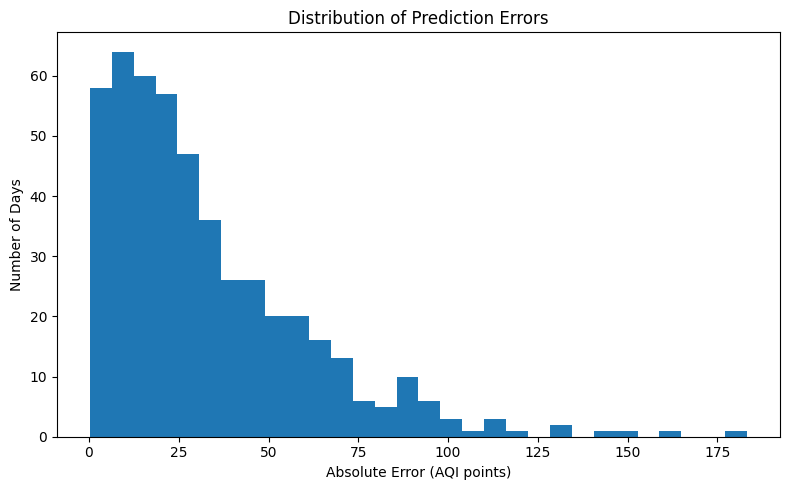

In [55]:
# VISUALIZATIONS FOR ERROR ANALYSIS

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(test_df['abs_error'], bins=30)

plt.xlabel('Absolute Error (AQI points)')
plt.ylabel('Number of Days')
plt.title('Distribution of Prediction Errors')

plt.tight_layout()
plt.savefig('../data/outputs/charts/Evaluation/Distribution_of_Prediction_Errors.png')
plt.show()


The error distribution shows that the model makes small-to-moderate errors on most days, with a long right tail corresponding to rare extreme pollution events. This indicates stable performance under normal conditions, while highlighting the inherent difficulty of predicting sudden AQI spikes.

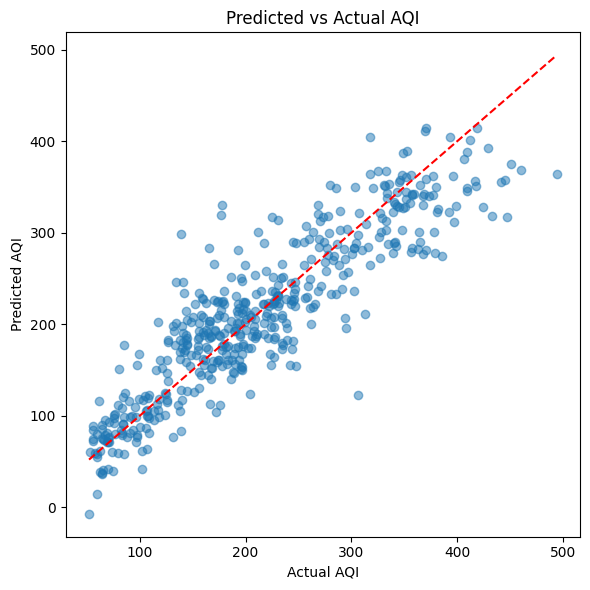

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')

plt.tight_layout()
plt.savefig('../data/outputs/charts/Evaluation/predicted_vs_actual_aqi.png')
plt.show()


The model performs well across normal AQI ranges and captures overall trends accurately. However, it underpredicts extreme pollution events, reflecting the challenge of modeling sudden AQI spikes using daily meteorological variables.

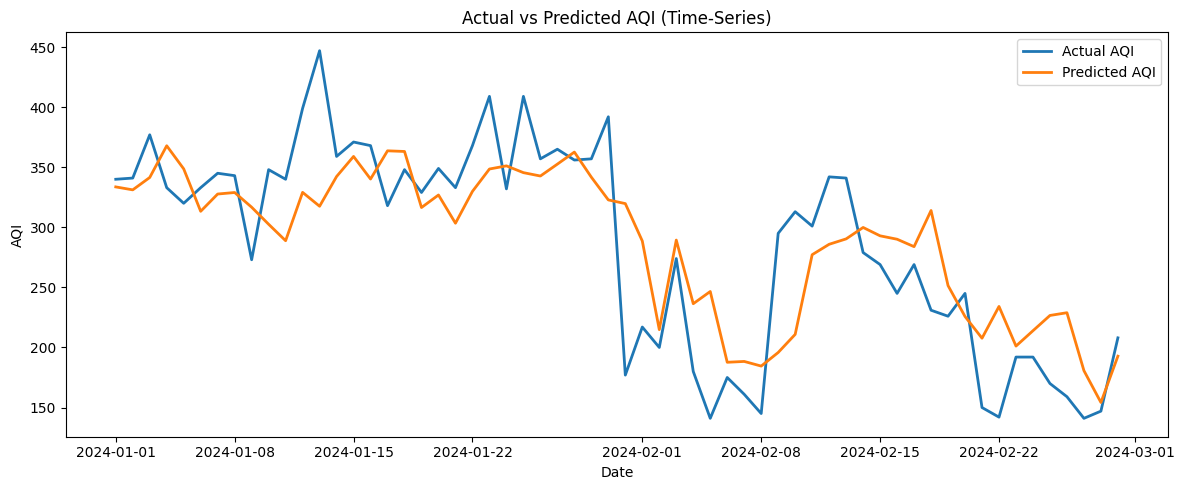

In [56]:
# picking a small continuous window
sample = test_df.iloc[:60]  # ~2 months

plt.figure(figsize=(12, 5))

plt.plot(sample['date'], sample['target_aqi'], label='Actual AQI', linewidth=2)
plt.plot(sample['date'], sample['prediction'], label='Predicted AQI', linewidth=2)

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI (Time-Series)')
plt.legend()
plt.tight_layout()
plt.savefig('../data/outputs/charts/Evaluation/actual_vs_predicted_aqi_timeseries.png')
plt.show()


The model tracks AQI trends well over time and captures daily variations effectively. However, it smooths sudden spikes and drops, reflecting the challenge of predicting abrupt pollution events using daily-level meteorological features.